In [ ]:
import graphviz.backend as be

In [ ]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.5 MB/s eta 0:00:00


In [ ]:
from sklearn.datasets import *
from dtreeviz import dtreeviz
from IPython.display import Image, display_svg, SVG

In [ ]:
clas = tree.DecisionTreeClassifier(max_depth=3)
iris = load_iris()

X_train = iris.data
y_train = iris.target

clas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

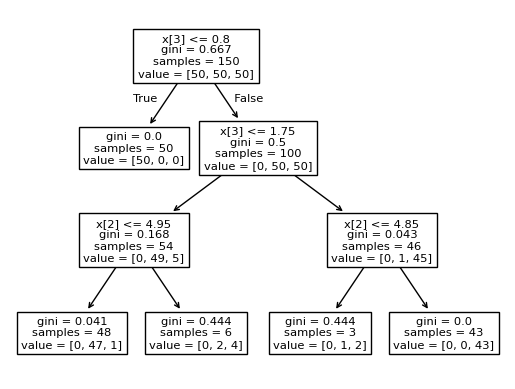

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clas)

In [ ]:
from dtreeviz import model
m = model(clas,
          iris.data,
          iris.target,
          feature_names=iris.feature_names,
          class_names=iris.target_names)
viz = m.view()

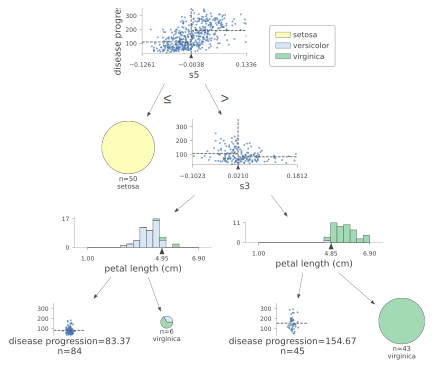

In [ ]:
display(SVG(viz.svg()))

# Regression

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X_train = diabetes.data
y_train = diabetes.target

In [ ]:
import pandas as pd

print("First 5 rows of X_train (features):")
display(pd.DataFrame(X_train, columns=diabetes.feature_names).head())

print("\nFirst 5 rows of y_train (target):")
display(pd.DataFrame(y_train, columns=["target"]).head())

First 5 rows of X_train (features):


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641



First 5 rows of y_train (target):


,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
from dtreeviz import model

m_regr = model(regr,
               X_train,
               y_train,
               feature_names=diabetes.feature_names,
               target_name='disease progression')
viz_regr = m_regr.view(scale=1, show_node_labels=True)

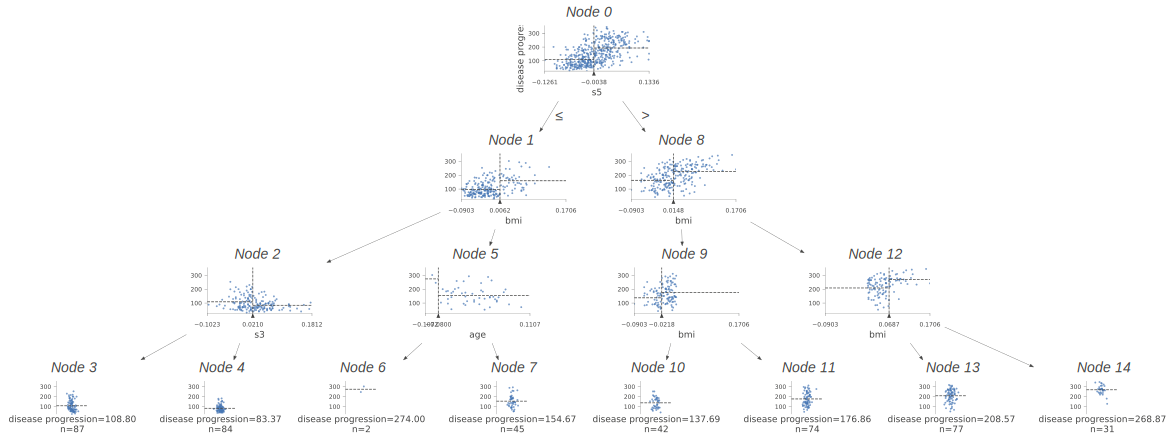

In [ ]:
display(SVG(viz_regr.svg()))

# Show the prediction part

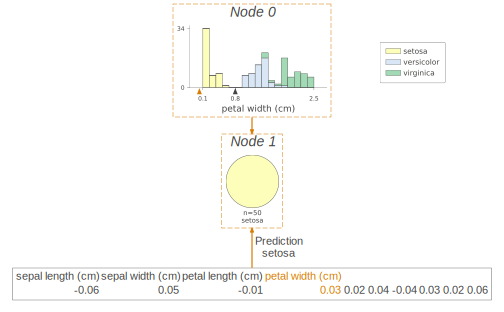

In [ ]:
# Visualize prediction path for a specific instance
prediction_instance = X_train[118]
viz_path = m.view(x=prediction_instance, show_just_path=True, show_node_labels=True)
display(SVG(viz_path.svg()))

# Explain prediction path in plain English

In [ ]:
print(m.explain_prediction_path(prediction_instance))

petal width (cm) < 0.8



# Important Feature in Iris

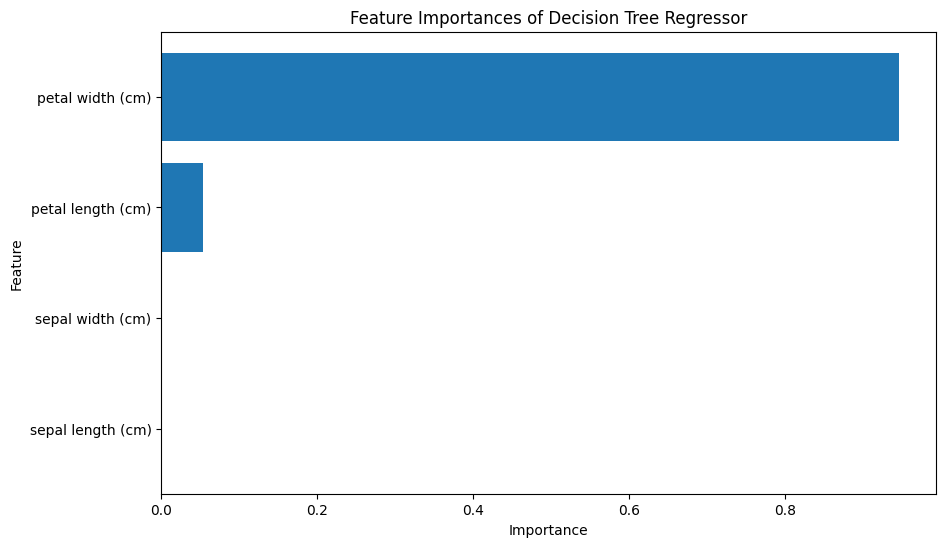

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the regr model
feature_importance_df = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': clas.feature_importances_
})

# Sort for better visualization
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances of Decision Tree Regressor")
plt.gca().invert_yaxis() # Display most important feature at the top
plt.show()

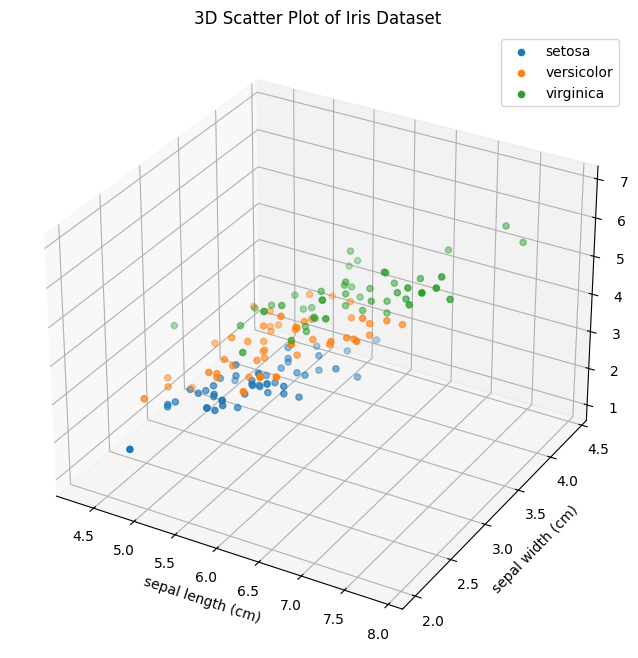

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get feature data and target
X = iris.data
y = iris.target

# Choose three features for the 3D plot
# Using sepal length, sepal width, and petal length
feature_x = 0  # sepal length (cm)
feature_y = 1  # sepal width (cm)
feature_z = 2  # petal length (cm)

# Plot each species with a different color
for i, species in enumerate(iris.target_names):
    ax.scatter(X[y == i, feature_x],
               X[y == i, feature_y],
               X[y == i, feature_z],
               label=species)

ax.set_xlabel(iris.feature_names[feature_x])
ax.set_ylabel(iris.feature_names[feature_y])
ax.set_zlabel(iris.feature_names[feature_z])
ax.set_title("3D Scatter Plot of Iris Dataset")
ax.legend()
plt.show()

### Visualizing Data Splits for Iris Classification Tree

The `dtreeviz` output below illustrates the data splits at each node. For classification trees, each node shows the distribution of classes present in the data reaching that node. The splits (branches) are determined by the feature values that best separate the classes.

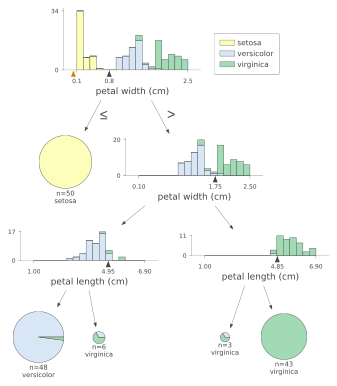

In [ ]:
display(SVG(viz.svg()))

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Imported matplotlib for 3D plotting.")

Imported matplotlib for 3D plotting.


# Not generated by dtreeviz

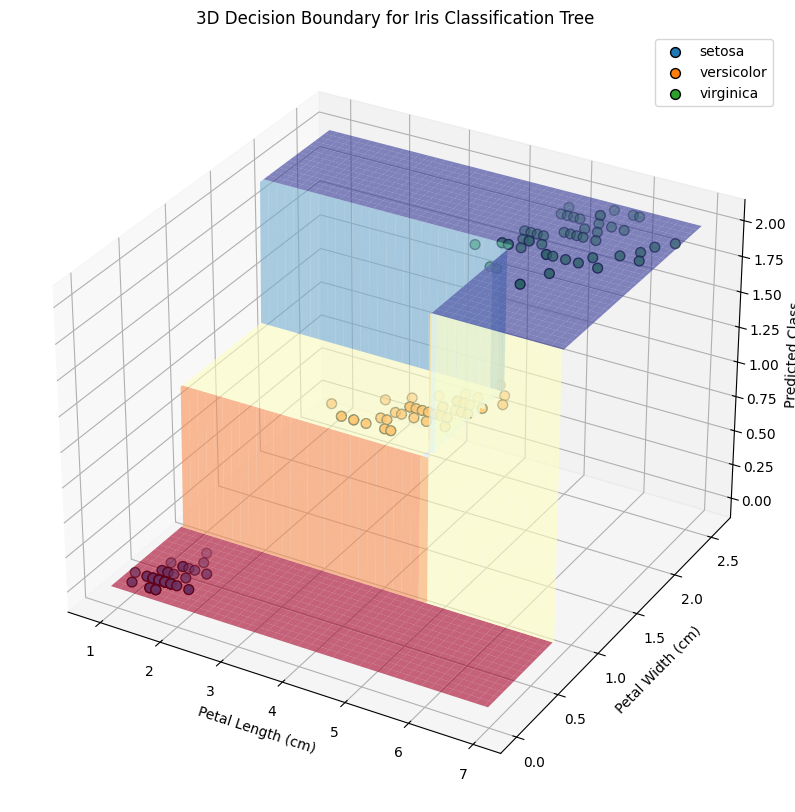

In [ ]:
import numpy as np

# Get indices for petal length and petal width from iris feature names
petal_length_idx = iris.feature_names.index('petal length (cm)')
petal_width_idx = iris.feature_names.index('petal width (cm)')

# Create a subset of iris.data with only these two features for visualization
X_plot = iris.data[:, [petal_length_idx, petal_width_idx]]

# Define the mesh grid for the decision surface
x_min, x_max = X_plot[:, 0].min() - 0.1, X_plot[:, 0].max() + 0.1
y_min, y_max = X_plot[:, 1].min() - 0.1, X_plot[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# To predict on the meshgrid, we need to pass all 4 features to the classifier.
# We'll assume the other two features (sepal length, sepal width) are held constant
# at their mean values from the IRIS dataset for the decision boundary prediction.
mean_sepal_length = np.mean(iris.data[:, iris.feature_names.index('sepal length (cm)')])
mean_sepal_width = np.mean(iris.data[:, iris.feature_names.index('sepal width (cm)')])

# Create a full feature array for prediction on the meshgrid (4 features for Iris)
Z_features = np.zeros((xx.ravel().shape[0], iris.data.shape[1])) # Use iris.data.shape[1] (which is 4)
Z_features[:, petal_length_idx] = xx.ravel()
Z_features[:, petal_width_idx] = yy.ravel()
Z_features[:, iris.feature_names.index('sepal length (cm)')] = mean_sepal_length
Z_features[:, iris.feature_names.index('sepal width (cm)')] = mean_sepal_width

# Predict class for each point in the meshgrid
Z = clas.predict(Z_features).reshape(xx.shape)

# Set up the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision surface
ax.plot_surface(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6, linewidth=0, antialiased=True)

# Plot the original data points (using iris.data and iris.target)
for i, target_name in enumerate(iris.target_names):
    ax.scatter(iris.data[iris.target == i, petal_length_idx],
               iris.data[iris.target == i, petal_width_idx],
               iris.target[iris.target == i],
               label=target_name, s=50, edgecolors='k')

ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Predicted Class')
ax.set_title('3D Decision Boundary for Iris Classification Tree')
ax.legend()
plt.show()